In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


health_data = pd.read_csv('healthmonitoring.csv')
print(health_data.head())

   PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0          1   69    Male  60.993428        130/85               15   
1          2   32    Male  98.723471        120/80               23   
2          3   78  Female  82.295377        130/85               13   
3          4   38  Female  80.000000        111/78               19   
4          5   41    Male  87.531693        120/80               14   

   BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0        98.885236       resting              95.0    excellent         low   
1        98.281883       walking              97.0         good        high   
2        98.820286       resting              98.0         fair        high   
3        98.412594       running              98.0         poor    moderate   
4        99.369871       resting              98.0         good         low   

                    Timestamp  
0  2024-04-26 17:28:55.286711  
1  2024-04-26 17:23:55.286722  
2 

In [2]:
#Checking if the data has null values

health_data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
HeartRate,0
BloodPressure,0
RespiratoryRate,0
BodyTemperature,18
ActivityLevel,0
OxygenSaturation,163
SleepQuality,0


In [3]:
# We can see the data has null values in body temperature and oxygen saturation columns. For ease, fill the null values using the median value:
# calculate medians

median_body_temp = health_data['BodyTemperature'].median()
median_oxygen_sat = health_data['OxygenSaturation'].median()


# fill missing values
health_data['BodyTemperature'].fillna(median_body_temp, inplace=True)
health_data['OxygenSaturation'].fillna(median_oxygen_sat, inplace=True)

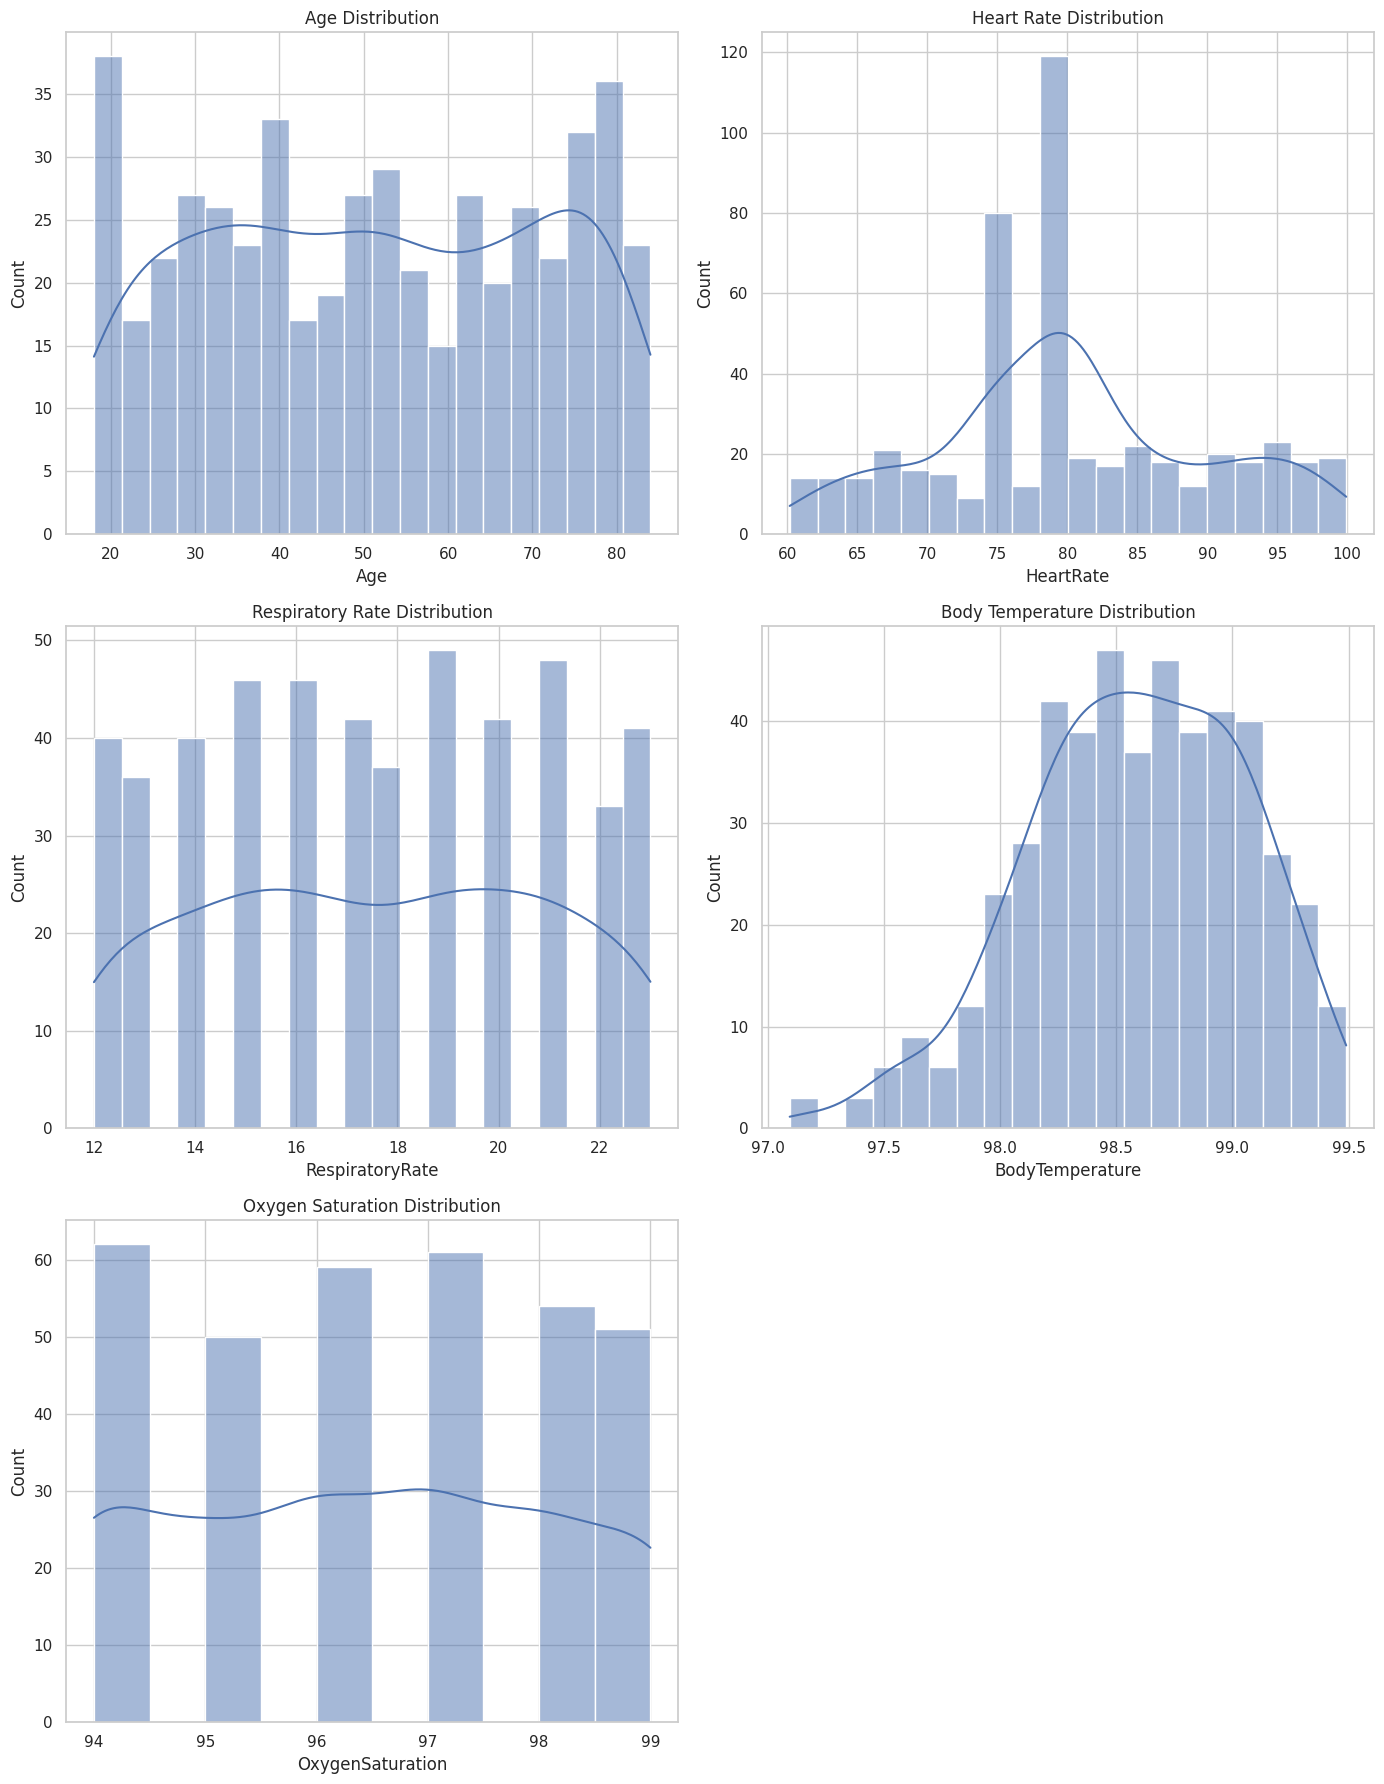

        PatientID         Age   HeartRate  RespiratoryRate  BodyTemperature  \
count  500.000000  500.000000  500.000000       500.000000       482.000000   
mean   250.500000   51.146000   80.131613        17.524000        98.583458   
std    144.481833   19.821566    9.606273         3.382352         0.470033   
min      1.000000   18.000000   60.169259        12.000000        97.094895   
25%    125.750000   34.000000   75.000000        15.000000        98.274100   
50%    250.500000   51.000000   80.000000        17.500000        98.609167   
75%    375.250000   69.000000   86.276413        20.000000        98.938284   
max    500.000000   84.000000   99.925508        23.000000        99.489150   

       OxygenSaturation  
count        337.000000  
mean          96.439169  
std            1.698216  
min           94.000000  
25%           95.000000  
50%           96.000000  
75%           98.000000  
max           99.000000  


In [6]:
#Next, we'll explore the summary statistics and analyze the distribution of key numerical health metrics, such as Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation. This analysis will provide insights into the central tendencies and variability of these metrics, helping us understand the typical ranges and spread of the data. Additionally, I’ll incorporate visualizations to enhance our understanding of how these values are distributed across the patient population.
sns.set(style="whitegrid")

# summary statistics
summary_stats = health_data.describe()

# plotting distributions of numerical features
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
sns.histplot(health_data['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(health_data['HeartRate'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate Distribution')

sns.histplot(health_data['RespiratoryRate'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Respiratory Rate Distribution')

sns.histplot(health_data['BodyTemperature'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Body Temperature Distribution')

sns.histplot(health_data['OxygenSaturation'], bins=10, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Oxygen Saturation Distribution')

fig.delaxes(axes[2,1])  # remove unused subplot

plt.tight_layout()
plt.show()

print(summary_stats)

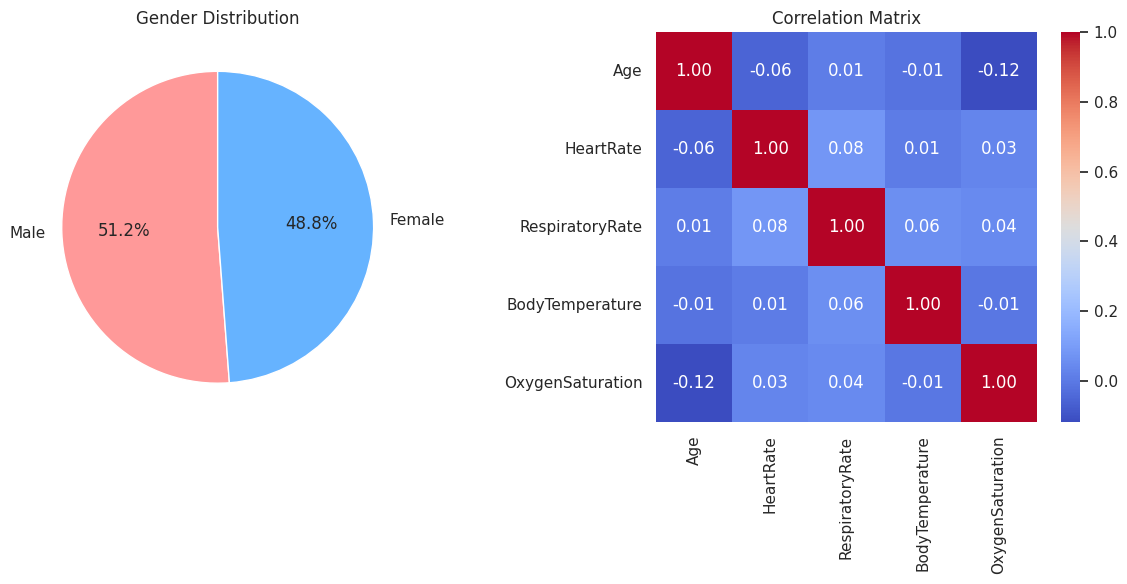

In [7]:
# Having a look at the gender distribution in the data and the correlation between the numerical columns in the dataset:

# gender Distribution
gender_counts = health_data['Gender'].value_counts()

# correlation Matrix for numerical health metrics
correlation_matrix = health_data[['Age', 'HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation']].corr()

# plotting the findings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# gender distribution plot
gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

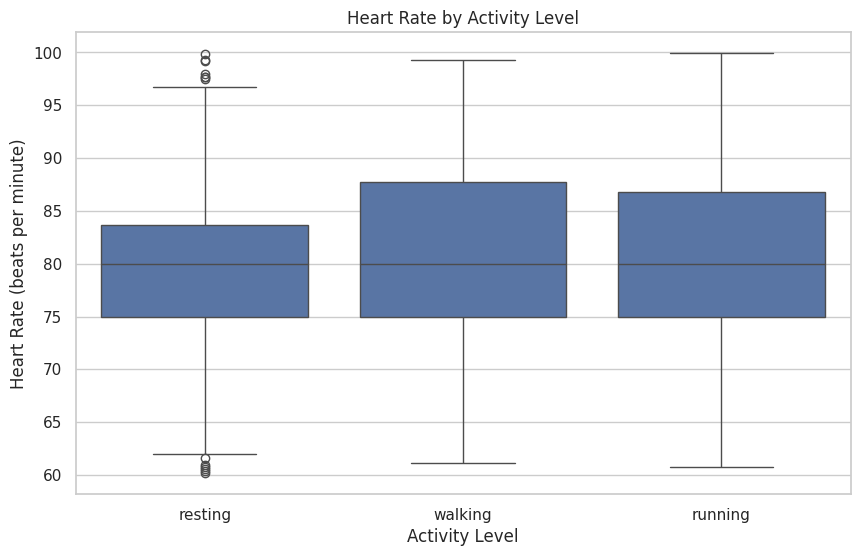

In [8]:
#Having a look at the heart rate by activity level:

# heart Rate by activity level
plt.figure(figsize=(10, 6))
sns.boxplot(x='ActivityLevel', y='HeartRate', data=health_data)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate (beats per minute)')
plt.xlabel('Activity Level')

plt.show()

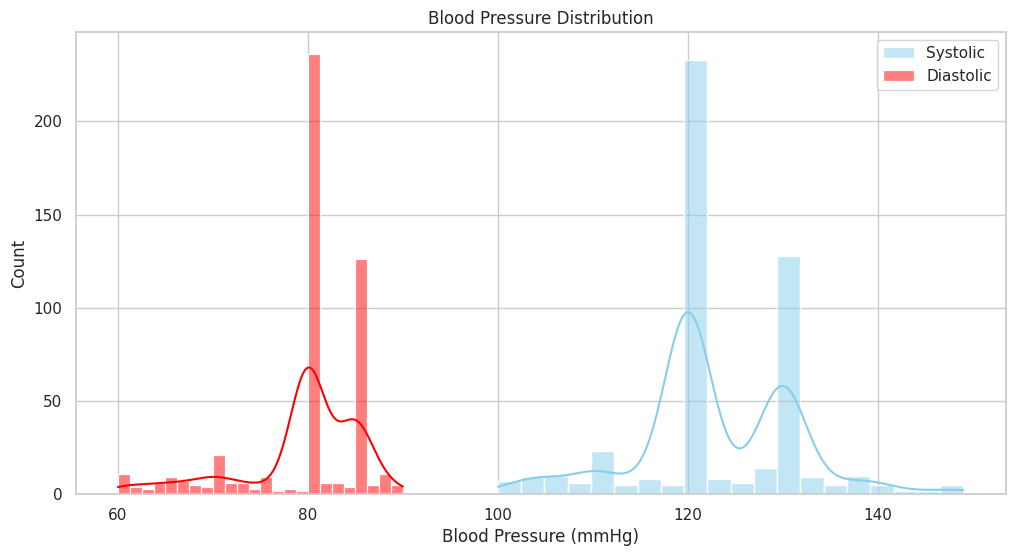

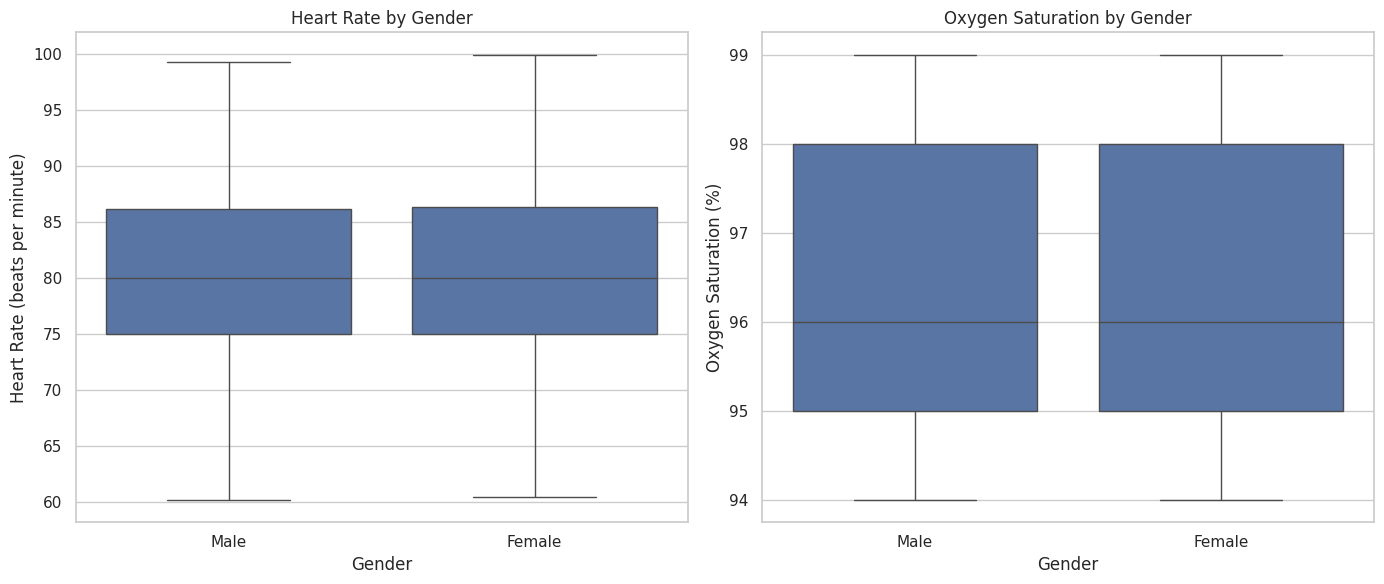

In [9]:
# having a look at the distribution of blood pressure levels and some health metrics by gender:

# extracting systolic and diastolic blood pressure for analysis
health_data[['SystolicBP', 'DiastolicBP']] = health_data['BloodPressure'].str.split('/', expand=True).astype(int)

# blood pressure distribution
plt.figure(figsize=(12, 6))
sns.histplot(health_data['SystolicBP'], color="skyblue", label="Systolic", kde=True)
sns.histplot(health_data['DiastolicBP'], color="red", label="Diastolic", kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.legend()
plt.show()

# health metrics by gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Gender', y='HeartRate', data=health_data, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (beats per minute)')

sns.boxplot(x='Gender', y='OxygenSaturation', data=health_data, ax=axes[1])
axes[1].set_title('Oxygen Saturation by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

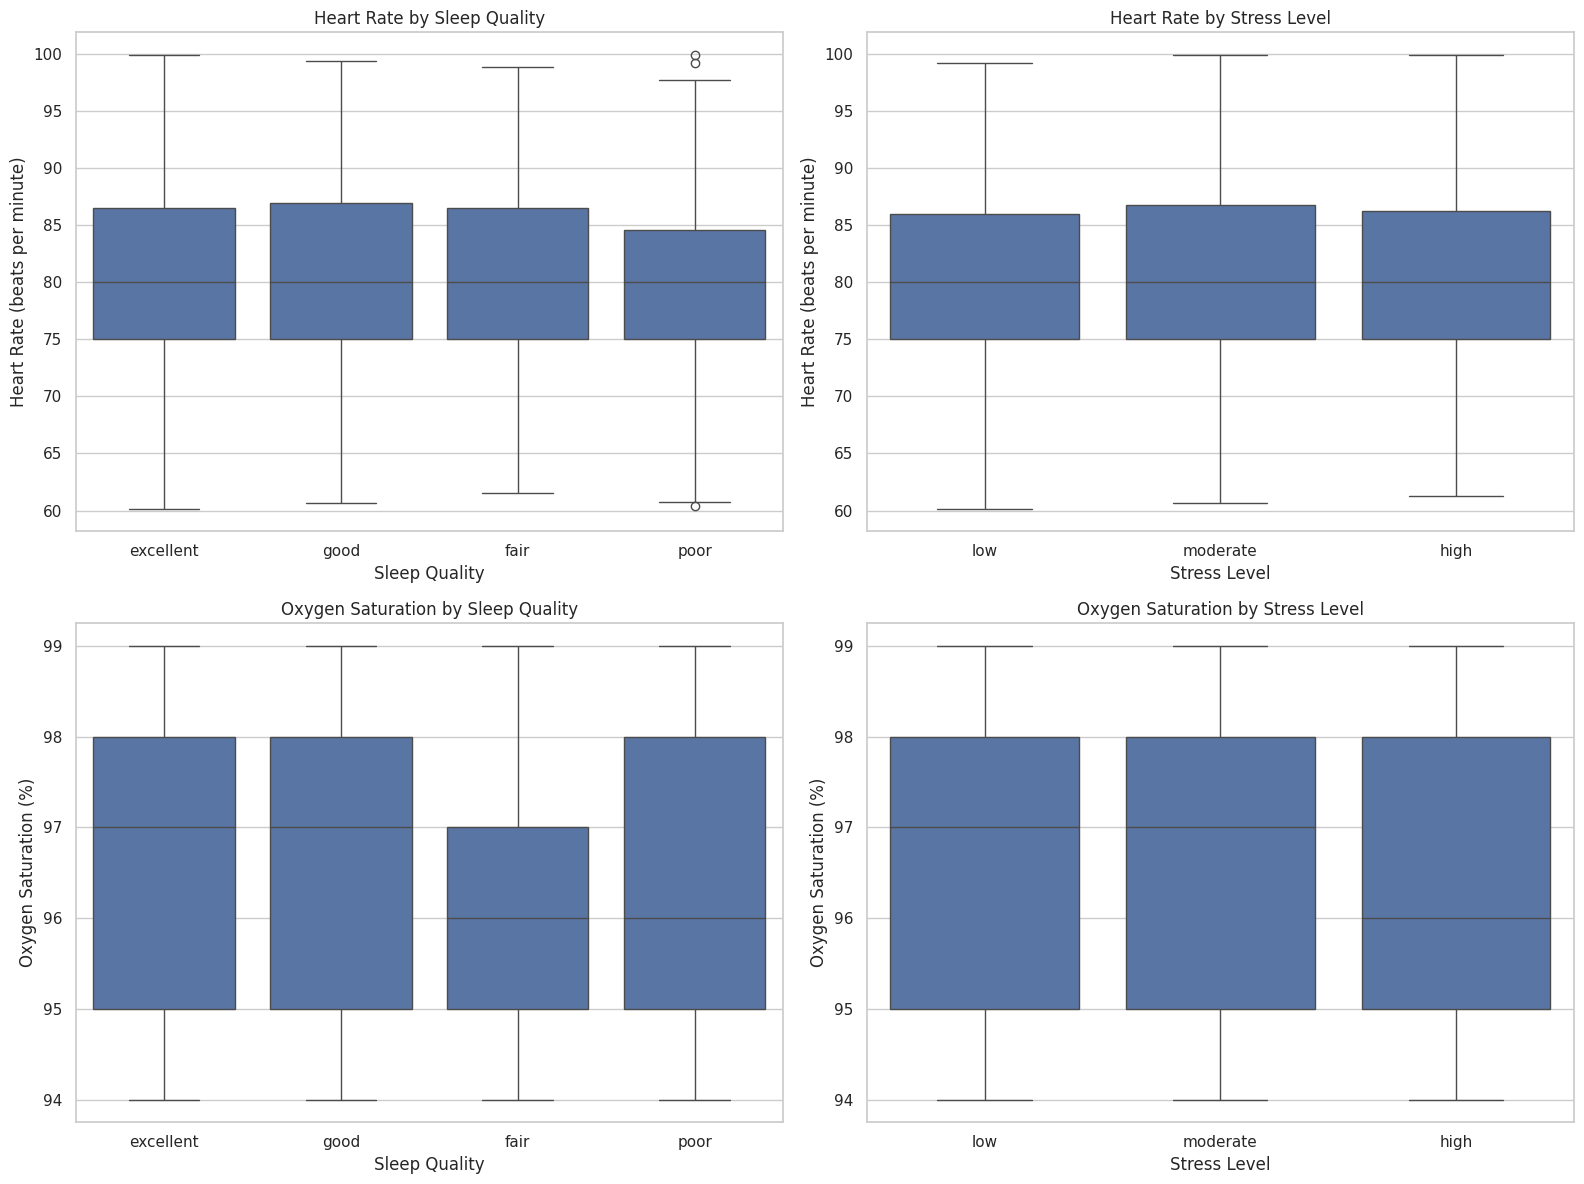

In [10]:
# analyzing the respiratory rate and body temperature by activity levels
# categorizing sleep quality and stress level for better analysis
sleep_quality_order = ['excellent', 'good', 'fair', 'poor']
stress_level_order = ['low', 'moderate', 'high']

# creating plots to examine relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# heart rate by sleep quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=health_data, order=sleep_quality_order, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate by Sleep Quality')
axes[0, 0].set_xlabel('Sleep Quality')
axes[0, 0].set_ylabel('Heart Rate (beats per minute)')

# heart rate by stress level
sns.boxplot(x='StressLevel', y='HeartRate', data=health_data, order=stress_level_order, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate by Stress Level')
axes[0, 1].set_xlabel('Stress Level')
axes[0, 1].set_ylabel('Heart Rate (beats per minute)')

# oxygen saturation by sleep quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=health_data, order=sleep_quality_order, ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Oxygen Saturation (%)')

# oxygen saturation by stress level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=health_data, order=stress_level_order, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation by Stress Level')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

In [11]:
# function to categorize Age
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# function to categorize Blood Pressure
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# function to categorize Heart Rate
def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

# function to categorize Oxygen Saturation
def oxy_category(oxy):
    if oxy < 94:
        return 'Low'
    else:
        return 'Normal'

# applying categorizations
health_data['AgeGroup'] = health_data['Age'].apply(age_group)
health_data['BPCategory'] = health_data.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis=1)
health_data['HRCategory'] = health_data['HeartRate'].apply(hr_category)
health_data['OxyCategory'] = health_data['OxygenSaturation'].apply(oxy_category)

print(health_data[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate', 'HRCategory', 'OxygenSaturation', 'OxyCategory']].head())

   Age     AgeGroup  SystolicBP  DiastolicBP BPCategory  HeartRate HRCategory  \
0   69       Senior         130           85   Elevated  60.993428     Normal   
1   32        Young         120           80   Elevated  98.723471     Normal   
2   78       Senior         130           85   Elevated  82.295377     Normal   
3   38  Middle-aged         111           78     Normal  80.000000     Normal   
4   41  Middle-aged         120           80   Elevated  87.531693     Normal   

   OxygenSaturation OxyCategory  
0              95.0      Normal  
1              97.0      Normal  
2              98.0      Normal  
3              98.0      Normal  
4              98.0      Normal  


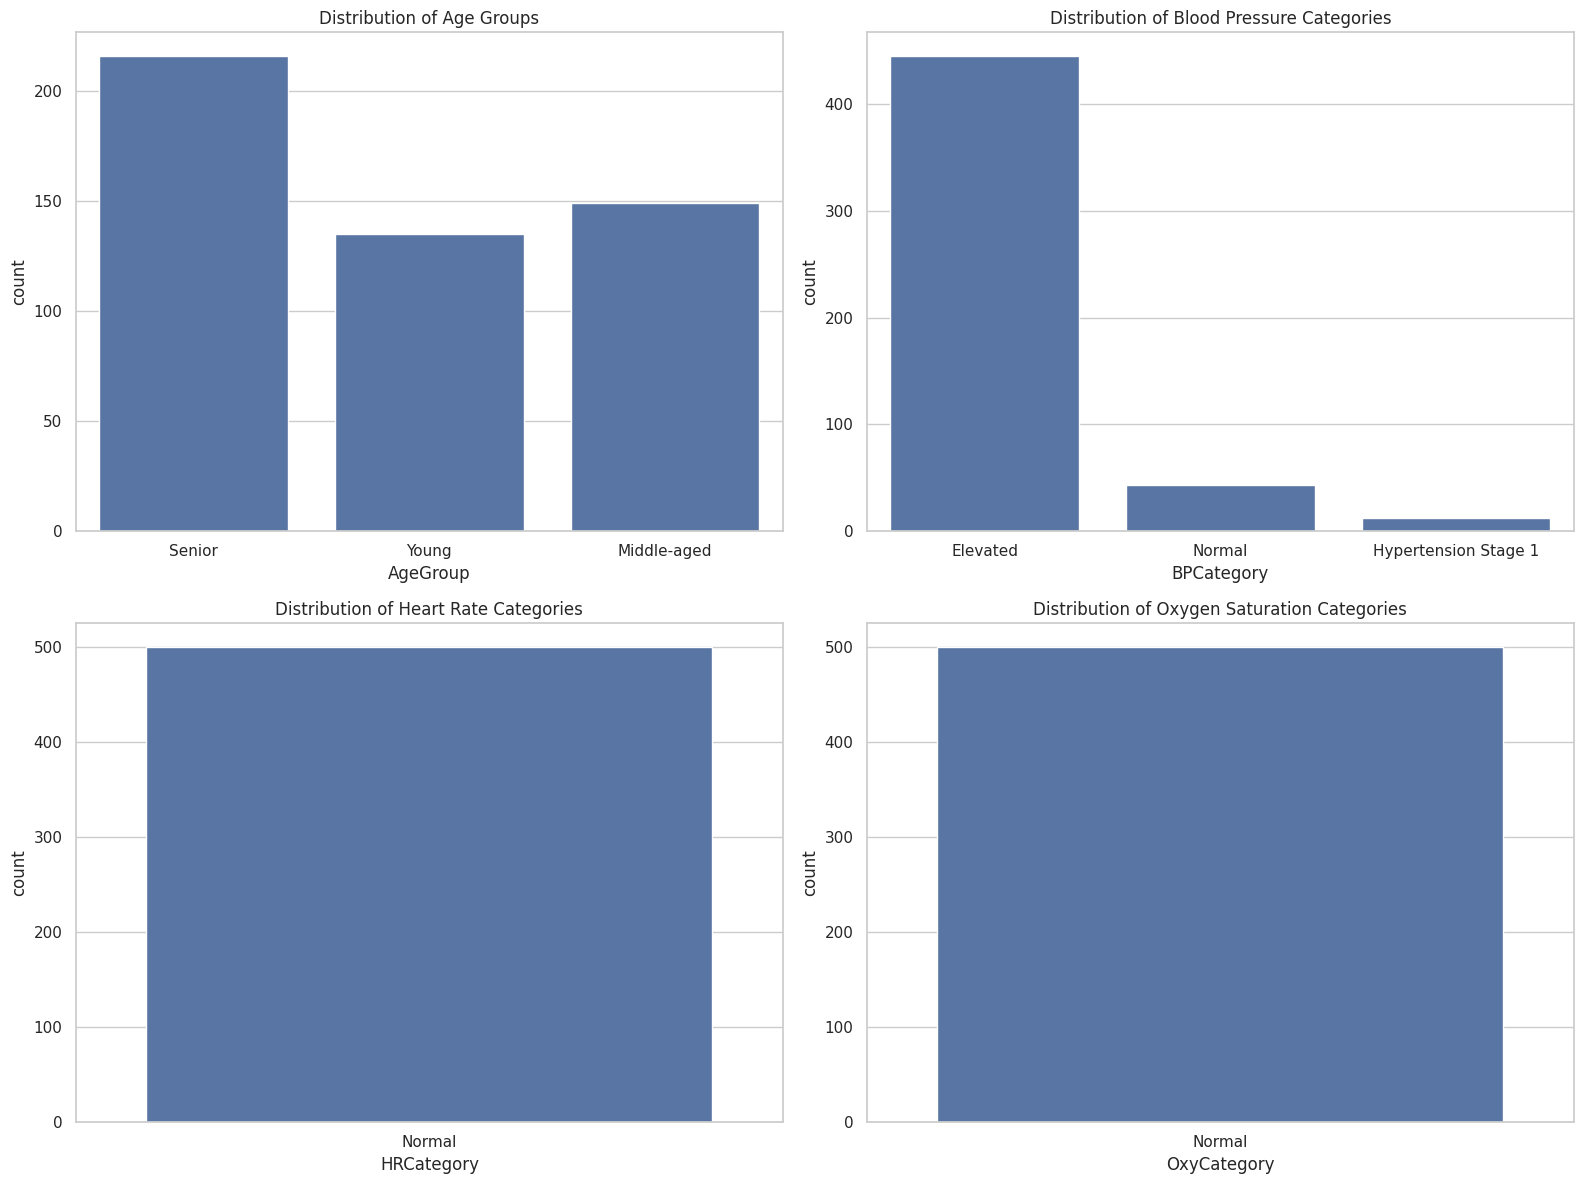

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Group count plot
sns.countplot(x='AgeGroup', data=health_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')

# Blood Pressure Category count plot
sns.countplot(x='BPCategory', data=health_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate Category count plot
sns.countplot(x='HRCategory', data=health_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation Category count plot
sns.countplot(x='OxyCategory', data=health_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Oxygen Saturation Categories')

# Show the plots
plt.tight_layout()
plt.show()